In [5]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
df=pd.read_csv('train_energy_data.csv')
df

,Building_Type,Square_Footage,Number_of_Occupants,Appliances_Used,Average_Temperature,Day_of_Week,Energy_Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17
...,...,...,...,...,...,...,...
995,Residential,14419,68,44,23.95,Weekend,3661.21
996,Industrial,12194,7,22,14.67,Weekend,3546.34
997,Commercial,39562,88,20,32.18,Weekday,5147.21
998,Residential,8348,67,37,16.48,Weekend,3244.98


In [7]:
df.shape

(1000, 7)

In [35]:
df.head()

,Building_Type,Square_Footage,Number_of_Occupants,Appliances_Used,Average_Temperature,Day_of_Week,Energy_Consumption
0,2,7063,76,10,29.84,0,2713.95
1,0,44372,66,45,16.72,0,5744.99
2,1,19255,37,17,14.30,1,4101.24
3,2,13265,14,41,32.82,0,3009.14
4,0,13375,26,18,11.92,0,3279.17


In [36]:
df.tail()

,Building_Type,Square_Footage,Number_of_Occupants,Appliances_Used,Average_Temperature,Day_of_Week,Energy_Consumption
995,2,14419,68,44,23.95,1,3661.21
996,1,12194,7,22,14.67,1,3546.34
997,0,39562,88,20,32.18,0,5147.21
998,2,8348,67,37,16.48,1,3244.98
999,0,15813,57,11,31.40,1,3423.63


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building_Type        1000 non-null   object 
 1   Square_Footage       1000 non-null   int64  
 2   Number_of_Occupants  1000 non-null   int64  
 3   Appliances_Used      1000 non-null   int64  
 4   Average_Temperature  1000 non-null   float64
 5   Day_of_Week          1000 non-null   object 
 6   Energy_Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [9]:
df.isnull().sum()

Building_Type          0
Square_Footage         0
Number_of_Occupants    0
Appliances_Used        0
Average_Temperature    0
Day_of_Week            0
Energy_Consumption     0
dtype: int64

In [10]:
df.duplicated().sum()

0

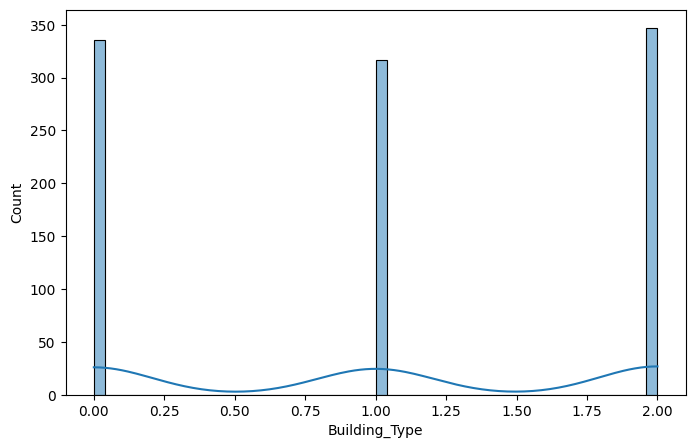

In [44]:
plt.figure(figsize=(8,5))
sns.histplot(df['Building_Type'],bins=50, kde=True)
plt.show()

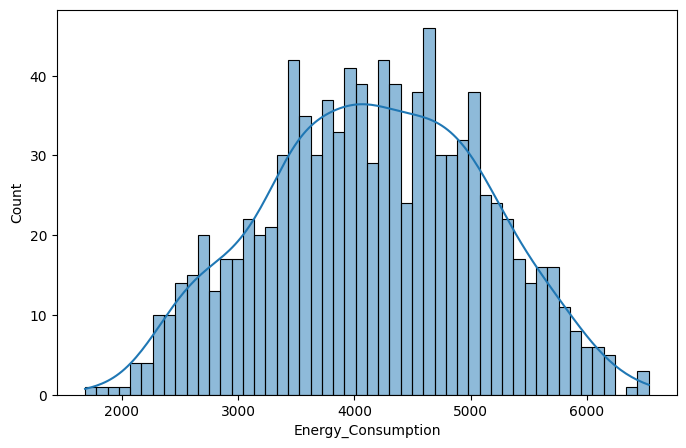

In [45]:
plt.figure(figsize=(8,5))
sns.histplot(df['Energy_Consumption'],bins=50, kde=True)
plt.show()

### ENCODING

#### label encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
df['Building_Type'].value_counts()

Building_Type
Residential    347
Commercial     336
Industrial     317
Name: count, dtype: int64

In [13]:
df['Building_Type'].unique()

array(['Residential', 'Commercial', 'Industrial'], dtype=object)

In [14]:
le=LabelEncoder()
df['Building_Type']=le.fit_transform(df['Building_Type'])

In [15]:
import pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)


In [16]:
df['Building_Type'].unique()

array([2, 0, 1])

In [17]:
df['Day_of_Week'].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [18]:
df['Day_of_Week']=le.fit_transform(df['Day_of_Week'])
df['Day_of_Week'].unique()

array([0, 1])

#### finding correlation

In [19]:
corr=df.corr()
print(corr)

                     Building_Type  Square_Footage  Number_of_Occupants  \
Building_Type             1.000000        0.041292            -0.002462   
Square_Footage            0.041292        1.000000             0.033379   
Number_of_Occupants      -0.002462        0.033379             1.000000   
Appliances_Used          -0.025035       -0.013478             0.023646   
Average_Temperature       0.038325        0.027273             0.014122   
Day_of_Week              -0.025229        0.011354             0.014296   
Energy_Consumption       -0.202358        0.774873             0.354485   

                     Appliances_Used  Average_Temperature  Day_of_Week  \
Building_Type              -0.025035             0.038325    -0.025229   
Square_Footage             -0.013478             0.027273     0.011354   
Number_of_Occupants         0.023646             0.014122     0.014296   
Appliances_Used             1.000000            -0.062870    -0.009046   
Average_Temperature        -0

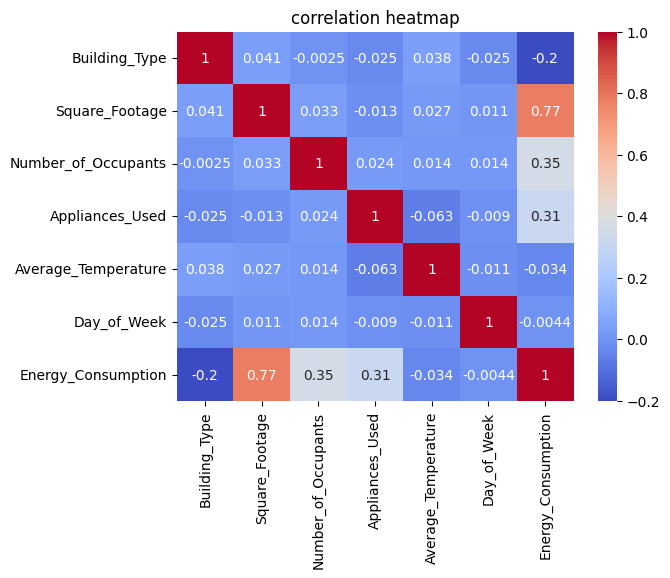

In [20]:
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('correlation heatmap')
plt.show()

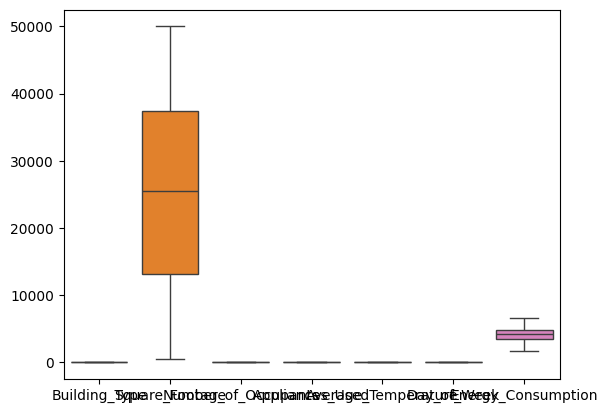

<Figure size 1000x1000 with 0 Axes>

In [21]:
sns.boxplot(df)
plt.figure(figsize=(10,10))
plt.show()

### DATA TRASFORMATION

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [24]:
x=df.drop(columns='Energy_Consumption')
y=df['Energy_Consumption']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [26]:
lass=Lasso(alpha=0.1)
lass.fit(x_train,y_train)
y_pred_lasso=lass.predict(x_test)

In [27]:
mae=mean_absolute_error(y_test,y_pred_lasso)
mse=mean_squared_error(y_test,y_pred_lasso)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_lasso)

print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Squared Error (MSE:{mse:,.2f} ")
print(f"Root Mean Squred Error (RMSE):{rmse:,.2f}")
print(f"R2 Score  {r2:.2f}")

Mean Absolute Error (MAE): 325.42
Mean Squared Error (MSE:121,796.82 
Root Mean Squred Error (RMSE):348.99
R2 Score  0.84


In [28]:
# linear=LinearRegression()
# linear.fit(x_train,y_train)
# y_predict_linear=linear.predict(x_test)

In [29]:
# mae=mean_absolute_error(y_test,y_predict_linear)
# mse=mean_squared_error(y_test,y_predict_linear)
# rmse=np.sqrt(mse)
# r2=r2_score(y_test,y_predict_linear)

In [30]:
# print(f"Mean Absolute Error (MAE): {mae:,.2f}")
# print(f"Mean Squared Error (MSE:{mse:,.2f} ")
# print(f"Root Mean Squred Error (RMSE):{rmse:,.2f}")
# print(f"R2 Score  {r2:.2f}")

In [31]:
import pickle

with open ('energymodel.pkl',"wb") as file:
    pickle.dump(lass,file)

## RIDGE

In [32]:
# ridge=Ridge(alpha=0.5)
# ridge.fit(x_train,y_train)
# y_pred_ridge=ridge.predict(x_test)

In [33]:
# mae=mean_absolute_error(y_test,y_pred_ridge)
# mse=mean_squared_error(y_test,y_pred_ridge)
# rmse=np.sqrt(mse)
# r2=r2_score(y_test,y_pred_ridge)

In [34]:
# print(f"Mean Absolute Error (MAE): {mae:,.2f}")
# print(f"Mean Squared Error (MSE:{mse:,.2f} ")
# print(f"Root Mean Squred Error (RMSE):{rmse:,.2f}")
# print(f"R2 Score  {r2:.2f}")